In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
img_1 = cv.imread('1.jpg')
img_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)

In [3]:
img_2 = cv.imread('2.jpg')
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

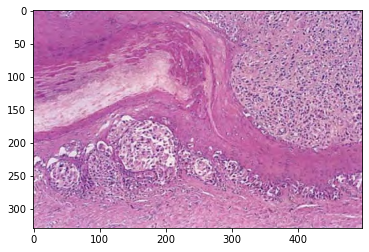

In [4]:
plt.imshow(img_1)

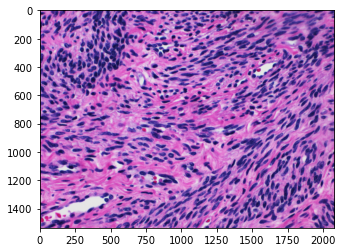

In [5]:
plt.imshow(img_2)

In [6]:
def img_normalised(img, alpha=1, beta=0.15, I0=240):
    
    h, w, _ = img.shape
    
    c_max_ref = np.array([1.9705, 1.0308])

    he_ref = np.array([[0.5626, 0.2159],
                       [0.7201, 0.8012],
                       [0.4062, 0.5581]])

    od = img.reshape(-1, 3).astype('float64')
    od = -np.log((od + 1) / I0)

    od_hat = od[~np.any(od<beta, axis=1)]

    _, eigvec = np.linalg.eigh(np.cov(od_hat.T))

    That = od_hat @ eigvec[:, 1:3]

    phi = np.arctan2(That[:, 1], That[:, 0])

    minPhi = np.percentile(phi, alpha)
    maxPhi = np.percentile(phi, 100-alpha)

    vMin = eigvec[:,1:3] @ np.array([(np.cos(minPhi), 
                                      np.sin(minPhi))]).T
    vMax = eigvec[:,1:3] @ np.array([(np.cos(maxPhi), 
                                      np.sin(maxPhi))]).T

    if vMin[0] < vMax[0]:
        he = np.array([vMax[:,0], vMin[:,0]]).T
    else:
        he = np.array([vMin[:,0], vMax[:,0]]).T

    y = od.T

    he.shape
    c = np.linalg.lstsq(he, y, rcond=None)[0]

    c_max = np.array([np.percentile(c[0,:], 99),
                      np.percentile(c[1,:], 99)])
    tmp = c_max /c_max_ref
    c /= tmp[:, np.newaxis]

    img_normed = I0 * np.exp(-he_ref @ c)
    img_normed[img_normed >255] = 255
    img_normed = img_normed.T.reshape(h, w, 3)
    img_normed = img_normed.astype('uint8')

    hema = I0 * np.exp(np.expand_dims(-he_ref[:,0], axis=1)
                             @ np.expand_dims(c[0,:], axis=0))
    hema[hema>255] = 255
    hema = hema.T.reshape(h, w, 3).astype('uint8')

    eosin = I0 * np.exp(np.expand_dims(-he_ref[:,1], axis=1)
                        @ np.expand_dims(c[1,:], axis=0))
    eosin[eosin>255] = 255
    eosin = eosin.T.reshape(h, w, 3).astype('uint8')
    
    return img_normed, hema, eosin

In [7]:
a_1, b_1, c_1 = img_normalised(img_1)
a_2, b_2, c_2 = img_normalised(img_2)

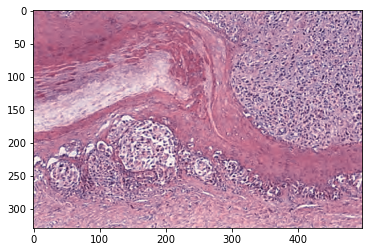

In [8]:
plt.imshow(a_1)

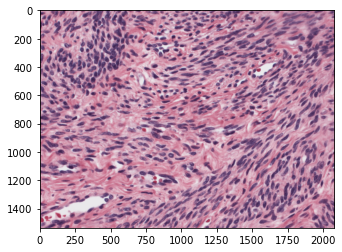

In [9]:
plt.imshow(a_2)

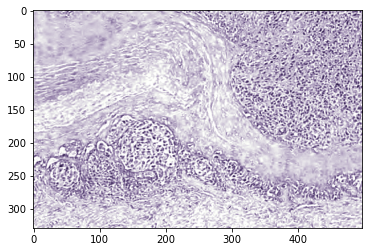

In [10]:
plt.imshow(b_1)

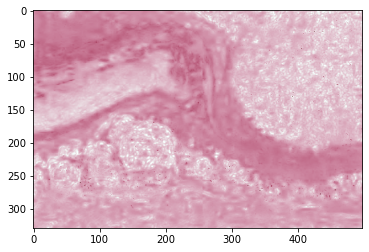

In [11]:
plt.imshow(c_1)

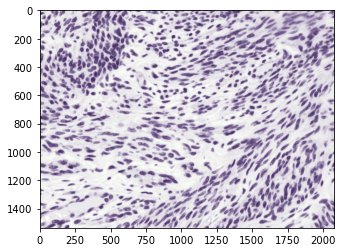

In [12]:
plt.imshow(b_2)

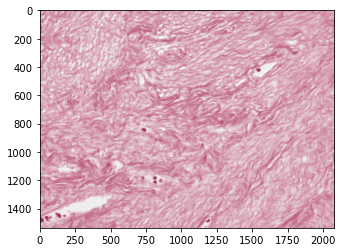

In [13]:
plt.imshow(c_2)